### ADS500B
##### Loza Mengitsu, Caleb McCurdy, Gabi Rivera

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma

# House Sales Dataset 

This final project studies the house sales dataset.<br>


This dataset contains details of house sales in neighborhoods of King County, Washington. <br>
It includes data for houses sold between May 2014 and May 2015.  <br>
<br>
Origin: Kaggle<br>
File Type: CSV<br>
File Size: 2.5 MB<br>
Modeling Problem: Regression<br>
Missing Values: Yes<br>
<br>
<br>
Attributes:<br>
id - a numerical identity field for each house sale<br>
date - date when the house is sold<br>
price - house sale price amount in US dollars (dependent variable)<br>
bedrooms - number of bedrooms in the house<br>
bathrooms - number of bathrooms in the house<br>
sqft_living - living area in square feet<br>
sqft_lot - total lot area in square feet<br>
floors - number of floors in the house<br>
waterfront - binary field, 1 if the house has a waterfront, 0 for no waterfront<br>
view - binary field, 1 if the house has a view, 0 for no view<br>
condition - a number denoting the condition of the house<br>
grade - a number denoting the grade of the house<br>
sqft_basement - area in square feet if the house has a basement<br>
yr_built - in which year is the house built<br>
yr_renovated - year when a house is renovated, 0 if not renovated<br>
zipcode - house location zipcode in the county<br>
lat - latitude cooridnate <br>
long - longitude coordinate



## Data Pre-Processing

##### Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

In [2]:
houseSales = pd.read_csv('house_sales.csv')
houseSales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The following command helps us have an overview of the type of data we have available. We have 21 columns (for now) and 21613 observations. We use this to know what kind of processing we might need to do. For example, the date column as a type object, therefore we will not do numerical operations on this column without prior transformation. Other columns are either of continuous type (float64) or discrete (int64). 

A useful information to extract is that some of the continuous variables should instead be categorical variables, which we can double check using the dataset documentation (readme file).

In [3]:
houseSales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

##### Clean, wrangle, and handle missing data

The following gives us the number of missing values for each column. We will have to address these columns by either replacing missing values or ignoring them and removing them from the dataset.

In [4]:
houseSales.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There is missing data in 4 columns. More specifically, we are missing values in the 'bedrooms', 'bathrooms', 'sqft_living', and 'sqft_lot' columns.

In [5]:
lossDropna = 1 - houseSales.dropna().shape[0] / houseSales.shape[0]
print(f"If we ignore observations with at least 1 missing value, we lose {round(100*lossDropna, 2)}% of data.")

If we ignore observations with at least 1 missing value, we lose 18.48% of data.


Since ignoring observations with missing data results in a loss of almost 20% of the data, we will rather replace the missing values. Further, these are all numerical variable suggesting that a replacement is the better plan. We will look at the distribution of the 4 concerned variables to decide how.

In [6]:
houseSales.loc[:,['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']].describe().round(decimals = 2)

,bedrooms,bathrooms,sqft_living,sqft_lot
count,20479.00,20545.00,20503.00,20569.00
mean,3.37,2.11,2081.07,15179.82
std,0.93,0.77,915.04,41486.17
min,0.00,0.00,290.00,520.00
25%,3.00,1.50,1430.00,5040.00
50%,3.00,2.25,1920.00,7620.00
75%,4.00,2.50,2550.00,10708.00
max,33.00,8.00,12050.00,1651359.00


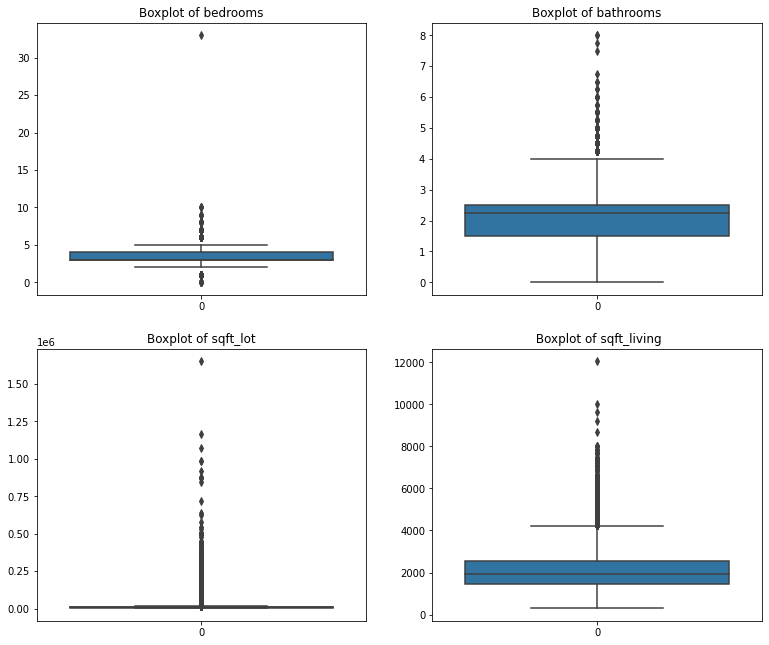

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(13, 11))
sns.boxplot(ax=axes[0, 1], data=houseSales["bathrooms"]);
axes[0, 1].set_title("Boxplot of bathrooms")
sns.boxplot(ax=axes[0, 0], data=houseSales["bedrooms"]);
axes[0, 0].set_title("Boxplot of bedrooms")
sns.boxplot(ax=axes[1, 1], data=houseSales["sqft_living"]);
axes[1, 1].set_title(" Boxplot of sqft_living")
sns.boxplot(ax=axes[1, 0], data=houseSales["sqft_lot"]);
axes[1, 0].set_title("Boxplot of sqft_lot")
plt.show()

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>]], dtype=object)

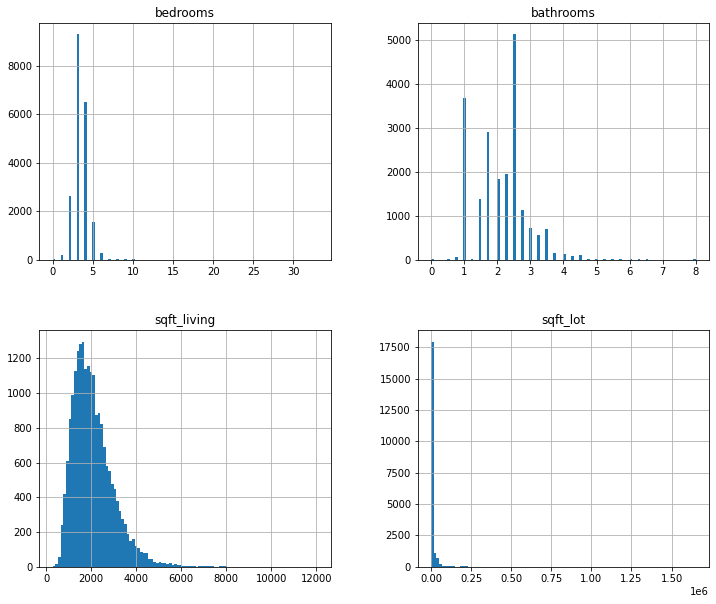

In [8]:
houseSales.loc[:,['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']].hist(bins=100, figsize = (12,10))

Given the distributions above, we expect that the mean of these variables will be distorted by the presence of outliers and their skewness, in particular for sqft_lot. Therefore we will replace missing values of each column by their respective medians.

In [9]:
houseSales['bedrooms'].fillna(houseSales['bedrooms'].median(), inplace=True)
houseSales['bathrooms'].fillna(houseSales['bathrooms'].median(), inplace=True)
houseSales['sqft_living'].fillna(houseSales['sqft_living'].median(), inplace=True)
houseSales['sqft_lot'].fillna(houseSales['sqft_lot'].median(), inplace=True)

In [10]:
houseSales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  float64
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

##### Transform data appropriately using techniques such as aggregation, normalization, and feature construction

New variables created: isRenovated, houseAge, zip4, and sqft_yard

In [11]:
houseSales['isRenovated'] = 1 * (houseSales['yr_renovated'] > 0)

yr_renovated is equal to the year during which the house was renovated and 0 if the house was never renovated. We transform it into a binary variable indicating if the house was renovated.

In [12]:
houseSales['houseAge'] = 2015 - houseSales['yr_built']

Using the construction date of the house, we create a variable giving the age of the house, in years, in 2015.

In [13]:
houseSales['zip4']=houseSales['zipcode'].apply(
    lambda x:str(x)[:4]) 

A zipcode is made of 5 digits and corresponds to a geographical area. Since there is a large number of zipcodes we process it to reduce the number of different values.
Considering the first 4 digits of a zipcode also gives a geographical area, but larger than the original one. We call this variable zip4.

In [14]:
houseSales['sqft_yard'] = houseSales['sqft_lot'] - houseSales['sqft_living']

Using the values of sqft_lot and sqft_living, we create another attribute that gives the area of land for each property which is not consumed by the house.

##### Reduce redundant data and perform need based discretization

Because 'sqft_living15' and 'sqft_lot15' seem like redundant data, we decided to drop these columns in our dataset.

In [15]:
houseSales = houseSales.drop('sqft_living15', axis=1)
houseSales = houseSales.drop('sqft_lot15', axis=1)

houseSales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,isRenovated,houseAge,zip4,sqft_yard
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,0,60,9817,4470.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1,64,9812,4672.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,0,82,9802,9230.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,0,50,9813,3040.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,0,28,9807,6400.0


## Data Analysis and Visualization

##### Identify categorical, ordinal, and numerical variables within data

We, once again, display the datatypes of each variable.

In [16]:
houseSales.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
isRenovated        int64
houseAge           int64
zip4              object
sqft_yard        float64
dtype: object

We change the attributes, if needed, into their correct data type.

In [17]:
houseSales['id'] = houseSales['id'].astype('category')
houseSales['date'] = houseSales['date'].astype('datetime64[ns]')
houseSales['waterfront'] = houseSales['waterfront'].astype('category')
houseSales['view'] = houseSales['view'].astype('category')
houseSales['condition'] = houseSales['condition'].astype('category')
houseSales['grade'] = houseSales['grade'].astype('category')
houseSales['yr_built'] = houseSales['yr_built'].astype('object')
houseSales['yr_renovated'] = houseSales['yr_renovated'].astype('object')
houseSales['zipcode'] = houseSales['zipcode'].astype('category')
houseSales['isRenovated'] = houseSales['isRenovated'].astype('category')
houseSales['zip4'] = houseSales['zip4'].astype('category')

houseSales.dtypes

id                     category
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                 object
yr_renovated             object
zipcode                category
lat                     float64
long                    float64
isRenovated            category
houseAge                  int64
zip4                   category
sqft_yard               float64
dtype: object

In [18]:
houseSales.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,isRenovated,houseAge,zip4,sqft_yard
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,0,60,9817,4470.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1,64,9812,4672.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,0,82,9802,9230.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,0,50,9813,3040.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,0,28,9807,6400.0


Above is a display of our dataset with updated types for the variables.

##### Provide measures of centrality and distribution with visualizations

The following command gives us a distribution for each of the numerical variables.

In [19]:
houseSales.loc[:,['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'sqft_above', 'sqft_basement', 'sqft_yard', 'houseAge']].describe().round(decimals = 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_yard,houseAge
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.35,2.12,2072.80,14814.65,1.49,1788.39,291.51,12741.85,43.99
std,367127.20,0.91,0.75,891.94,40504.19,0.54,828.09,442.58,40371.35,29.37
min,75000.00,0.00,0.00,290.00,520.00,1.00,290.00,0.00,-1900.00,0.00
25%,321950.00,3.00,1.75,1450.00,5140.00,1.00,1190.00,0.00,3220.00,18.00
50%,450000.00,3.00,2.25,1920.00,7620.00,1.50,1560.00,0.00,5700.00,40.00
75%,645000.00,4.00,2.50,2510.00,10404.00,2.00,2210.00,560.00,8434.00,64.00
max,7700000.00,33.00,8.00,12050.00,1651359.00,3.50,9410.00,4820.00,1650059.00,115.00


Because there is a negative value in the sqft_yard column for at least one of the records, there must have been an input error for either sqft_living or sqft_lot. As done with the missing data values, we will provide the median for each of these when this instance occurs.

In [20]:
houseSales.loc[houseSales.sqft_yard < 0, 'sqft_living'] = houseSales['sqft_living'].median()
houseSales.loc[houseSales.sqft_yard < 0, 'sqft_lot'] = houseSales['sqft_lot'].median()
houseSales.loc[houseSales.sqft_yard < 0, 'sqft_yard'] = houseSales['sqft_yard'].median()

Below are histograms of each of the quantitative variables, in regards to their distribution of values.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'sqft_yard'}>],
       [<AxesSubplot:title={'center':'houseAge'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

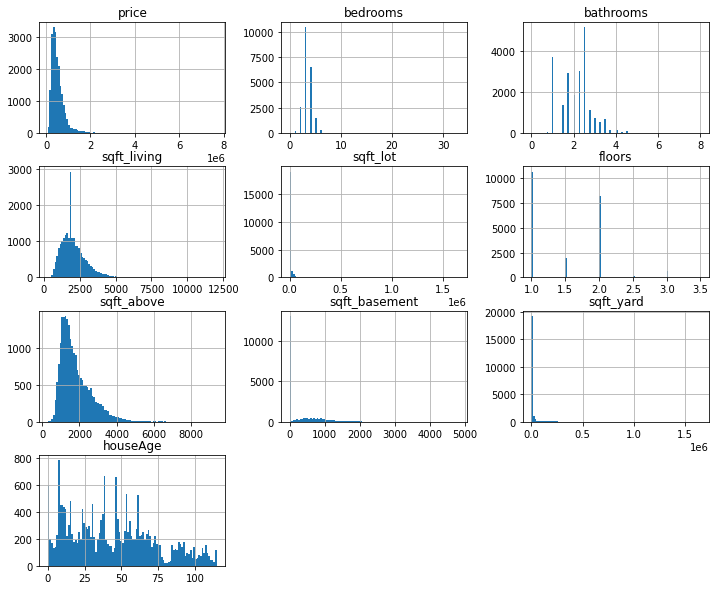

In [21]:
houseSales.loc[:,['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'sqft_above', 'sqft_basement', 'sqft_yard', 'houseAge']].hist(bins=100, figsize = (12,10))

##### Diagnose for correlations between variables and determine independent and dependent variables

For quantitative variables, we can look at the correlation matrix and then focus on the correlation with price.

In [22]:
houseSales.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,houseAge,sqft_yard
price,1.000000,0.302493,0.515365,0.674046,0.085919,0.256794,0.605567,0.323816,0.307003,0.021626,-0.054012,0.071450
bedrooms,0.302493,1.000000,0.487280,0.540894,0.023820,0.172168,0.465769,0.291689,-0.008874,0.126537,-0.150364,0.012066
bathrooms,0.515365,0.487280,1.000000,0.719603,0.085373,0.487859,0.667757,0.276989,0.026612,0.218557,-0.495315,0.069907
sqft_living,0.674046,0.540894,0.719603,1.000000,0.156664,0.371199,0.844318,0.413930,0.056589,0.225793,-0.331767,0.135292
sqft_lot,0.085919,0.023820,0.085373,0.156664,1.000000,0.004181,0.174172,0.014162,-0.082764,0.220199,-0.056870,0.999767
floors,0.256794,0.172168,0.487859,0.371199,0.004181,1.000000,0.523885,-0.245705,0.049614,0.125419,-0.489319,-0.003925
sqft_above,0.605567,0.465769,0.667757,0.844318,0.174172,0.523885,1.000000,-0.051943,-0.000816,0.343803,-0.423898,0.156261
sqft_basement,0.323816,0.291689,0.276989,0.413930,0.014162,-0.245705,-0.051943,1.000000,0.110538,-0.144765,0.133124,0.005153
lat,0.307003,-0.008874,0.026612,0.056589,-0.082764,0.049614,-0.000816,0.110538,1.000000,-0.135512,0.148122,-0.084266
long,0.021626,0.126537,0.218557,0.225793,0.220199,0.125419,0.343803,-0.144765,-0.135512,1.000000,-0.409356,0.215963


The following figure is a visual representation of the correlation between different quantitative variables. The value of the correlation is given by color of the cells; the lighter the cell, the stronger the correlation between the two corresponding attributes.

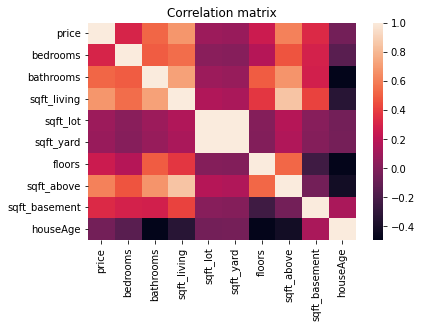

In [23]:
corr = houseSales[['price',
                   'bedrooms', 
                   'bathrooms', 
                   'sqft_living', 
                   'sqft_lot', 
                   'sqft_yard',
                   'floors',
                   'sqft_above',
                   'sqft_basement',
                   'isRenovated', 
                   'houseAge']].corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);
plt.title("Correlation matrix");

Below is another plot that helps to show the correlations between corresponding attributes.

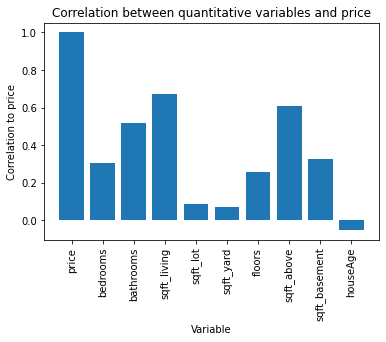

In [24]:
plt.bar(x= corr.columns, height=corr.price)
plt.xticks(list(range(corr.shape[0])), corr.index, rotation=90);
plt.ylabel("Correlation to price")
plt.xlabel("Variable")
plt.title("Correlation between quantitative variables and price");

##### Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Below are the unique values in the grade attribute.

In [25]:
houseSales['grade'].unique()

[7, 6, 8, 11, 9, ..., 12, 4, 3, 13, 1]
Length: 12
Categories (12, int64): [1, 3, 4, 5, ..., 10, 11, 12, 13]

Below are the unique values in the condition attribute.

In [26]:
houseSales['condition'].unique()

[3, 5, 4, 1, 2]
Categories (5, int64): [1, 2, 3, 4, 5]

The following figures help visualize the relationship between some categorical variables and the price of the house.

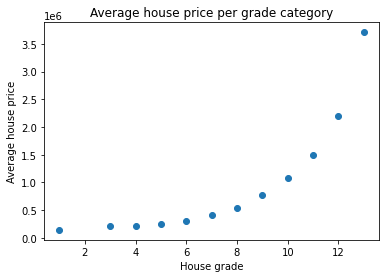

In [27]:
pricePerGrade = houseSales.groupby('grade').mean()['price']
plt.scatter(x=pricePerGrade.index, y=pricePerGrade);
plt.xlabel("House grade")
plt.ylabel("Average house price")
plt.title("Average house price per grade category");

There is a clear exponential relationship between the price and the grade.

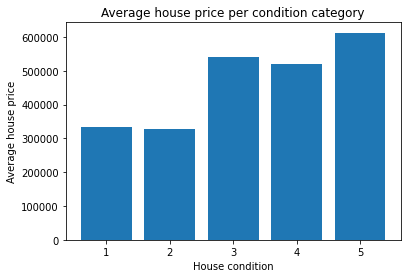

In [28]:
pricePerCondition = houseSales.groupby('condition').mean()['price']
plt.bar(x=pricePerCondition.index, height=pricePerCondition);
plt.xlabel("House condition")
plt.ylabel("Average house price")
plt.title("Average house price per condition category");

The condition of house also seems to impact average price, however less severely as compared to grade.

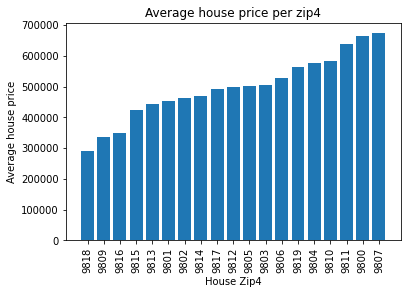

In [29]:
pricePerZip4 = houseSales.groupby('zip4').mean()['price'].sort_values()
plt.bar(x=pricePerZip4.index, height=pricePerZip4)
plt.xticks([i for i in range(len(pricePerZip4.index))], pricePerZip4.index, rotation=90);
plt.xlabel("House Zip4")
plt.ylabel("Average house price")
plt.title("Average house price per zip4");

Clearly some areas are more expensive than others, as can be seen at the zip4 level.

## Data Analytics

sqft_living seems to be the most correlated quantitative variable with price. The age of the house does not seem to be relevant, however it might be when combined with other variables. We will explore this when building our regression model. But first, we wanted to show the linear regression model between price and sqft_living as this is the most correlated variable.

In [30]:
x_linreg = houseSales['sqft_living']
y_linreg = houseSales['price']

x_linreg = sma.add_constant(x_linreg)

model_linreg = sma.OLS(y_linreg, x_linreg).fit()
predictions = model_linreg.predict(x_linreg)
print_model_linreg = model_linreg.summary()
print(print_model_linreg)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                 1.799e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:37:30   Log-Likelihood:            -3.0106e+05
No. Observations:               21613   AIC:                         6.021e+05
Df Residuals:                   21611   BIC:                         6.021e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.44e+04   4731.667     -9.384      

The equation of the regression line would be: price = 280.6230 * sqft_living - 44,440 <br>
If we were to predict the price of a house just based on the square feet of the house, we would be using a linear regression model with an adjusted R-squared value of 0.454, suggesting only a medium fit. We will instead use more variables to help us predict price, as shown in the following sections.

#### Regression model

Because we have the labels and values of the given House Sales dataset, we are able to perform a supervised learning method using the known correct outcome values of training sets. The training sets, and the patterns they contain, are used to make predictions on the price in the testing set.

Our dependent variable is price, and our explanatory variables are: <br> <br>
bedrooms: quantitative <br>
bathrooms: quantitative <br>
sqft_living: quantitative <br> 
sqft_lot: quantitative <br>
sqft_yard: quantitative <br>
floors: quantitative <br>
sqft_above: quantitative <br>
sqft_basement: quantitative <br>
isRenovated: quantitative <br> 
houseAge: quantitative <br> 

waterfront: categorical <br> 
view: categorical <br>
zip4: categorical <br>
condition: categorical <br>
grade: categorical <br><br>


We decide to use a regression decision tree to predict price as function of our explanatory variables. Since this model is able to handle categorical features, we will not process categorical data further (e.g. with one hot encoding). 

In [31]:
#pip install sklearn

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

We split the data into two parts: <br>
1. X: contains all of the variables used to predict the price
2. y: contains the price of the houses

In [33]:
X = houseSales[['bedrooms', 
                   'bathrooms', 
                   'sqft_living', 
                   'sqft_lot',
                   'sqft_yard',
                   'floors', 
                   'sqft_above',
                   'sqft_basement',
                   'isRenovated', 
                   'houseAge', 
                   'waterfront', 'view', 'zip4', 'condition', 'grade']]
y = houseSales.price

###### Creation of training and testing set 

We split our data into two sets: <br>

1. Trainset (X_train, y_train): This is the part of the data that we will use to train our model.
2. Testset (X_test, y_train): This part of the date is used to measure the quality of our model.
<br>

We use the function train_test_split to do that, and choose to put 30\% of the data into the test set.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)

###### Training the model

Here we choose to train a DecisionTreeRegressor model from library sklearn.

We choose the parameters of the model via cross validation on the training set.

The data used here is only the trainset.

In [35]:
regressor = DecisionTreeRegressor(random_state=0)
parameters = {'max_depth': [3, 5, 7, 9, 10, 15, 20], 
              'min_samples_split': [2, 4, 10, 20, 30, 50]}
model = GridSearchCV(regressor, parameters)
model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 9, 10, 15, 20],
                         'min_samples_split': [2, 4, 10, 20, 30, 50]})

###### Testing the model

Now the model is trained, we use the predict function to predict house prices using the variables.

We evaluate the quality of the model on the test set and also on the training set for comparison.

In [36]:
predictTrain = model.predict(X_train)
predictTest = model.predict(X_test)
print(f"MSE train: {mean_squared_error(y_train, predictTrain)} | MSE test: {mean_squared_error(y_test, predictTest)}")
print(f"MAE train: {mean_absolute_error(y_train, predictTrain)} | MAE test: {mean_absolute_error(y_test, predictTest)}")
print(f"R squared train: {r2_score(y_train, predictTrain)} | R squared test: {r2_score(y_test, predictTest)}")


MSE train: 27546745573.11343 | MSE test: 44642646644.47781
MAE train: 101759.05529247221 | MAE test: 123407.49951140535
R squared train: 0.7939614063620175 | R squared test: 0.6748342046837703


Our selected model performs relatively well being able to explain 67.5% of the variance in the data on the testing sample. However, the better performance of 79.4% variance explanation on the training set signals there is still some overfitting which may be addressed by using more regularization in the model or by gathering more data.

The two following figures represent the predicted values against the actual values and provide a visual way to assess the model quality. With a perfect model, every blue point would be on the red line. The further away from the red line they are, the bigger the error is.

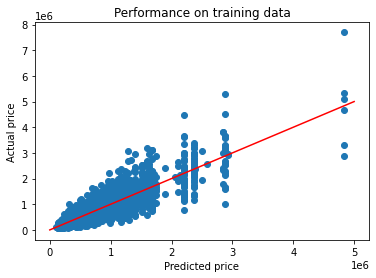

In [37]:
plt.scatter(predictTrain, y_train)
plt.plot([0,5e6], [0,5e6], color='r')
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Performance on training data");

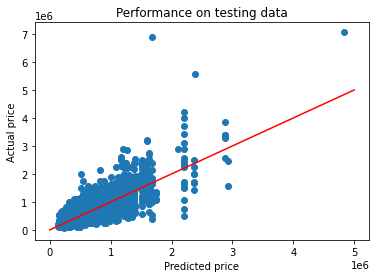

In [38]:
plt.scatter(predictTest, y_test)
plt.plot([0,5e6], [0,5e6], color='r')
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Performance on testing data");

Looking at the above plots we can vizualize how the predictions of our model differ from the actual values.

### Conclusion

We have performed some exploratory analysis on the house sales dataset and built a regression model to predict the price of the houses. Our proposed model could still be improved as the results show that it suffers from overfitting. Further exploration could consist of using different, more complex models.